In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn.objects as so

# Practica N°2 : Estadística descriptiva

## Archivos de datos

In [2]:
obj2 = pd.Series ([np.pi ,0,-2,1.41], index = ["d", "b", "c", "a"])
display(obj2)
display(obj2.array)
display(obj2.index)

d    3.141593
b    0.000000
c   -2.000000
a    1.410000
dtype: float64

<NumpyExtensionArray>
[3.141592653589793, 0.0, -2.0, 1.41]
Length: 4, dtype: float64

Index(['d', 'b', 'c', 'a'], dtype='object')

In [4]:
obj3 = obj2[["a","b"]]
display(obj3,
        obj3.index)

a    1.41
b    0.00
dtype: float64

Index(['a', 'b'], dtype='object')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\santi\AppData\Local\Temp\ipykernel_2332\1800200874.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\datasets\casos_coronavirus.csv") # dataFrame


,fecha,confirmados_Nuevos
0,3-3-2020,1
1,4-3-2020,0
2,5-3-2020,1
3,6-3-2020,6
4,7-3-2020,0


0    1
1    0
2    1
3    6
4    0
Name: confirmados_Nuevos, dtype: int64

<Axes: >

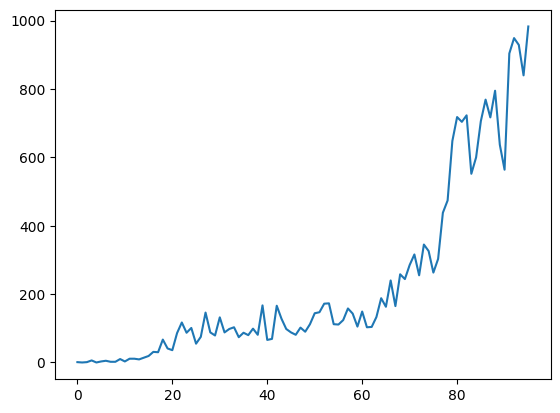

In [9]:
df = pd.read_csv("..\datasets\casos_coronavirus.csv") # dataFrame
display(df.head(),
        df["confirmados_Nuevos"].head())
df["confirmados_Nuevos"].plot()

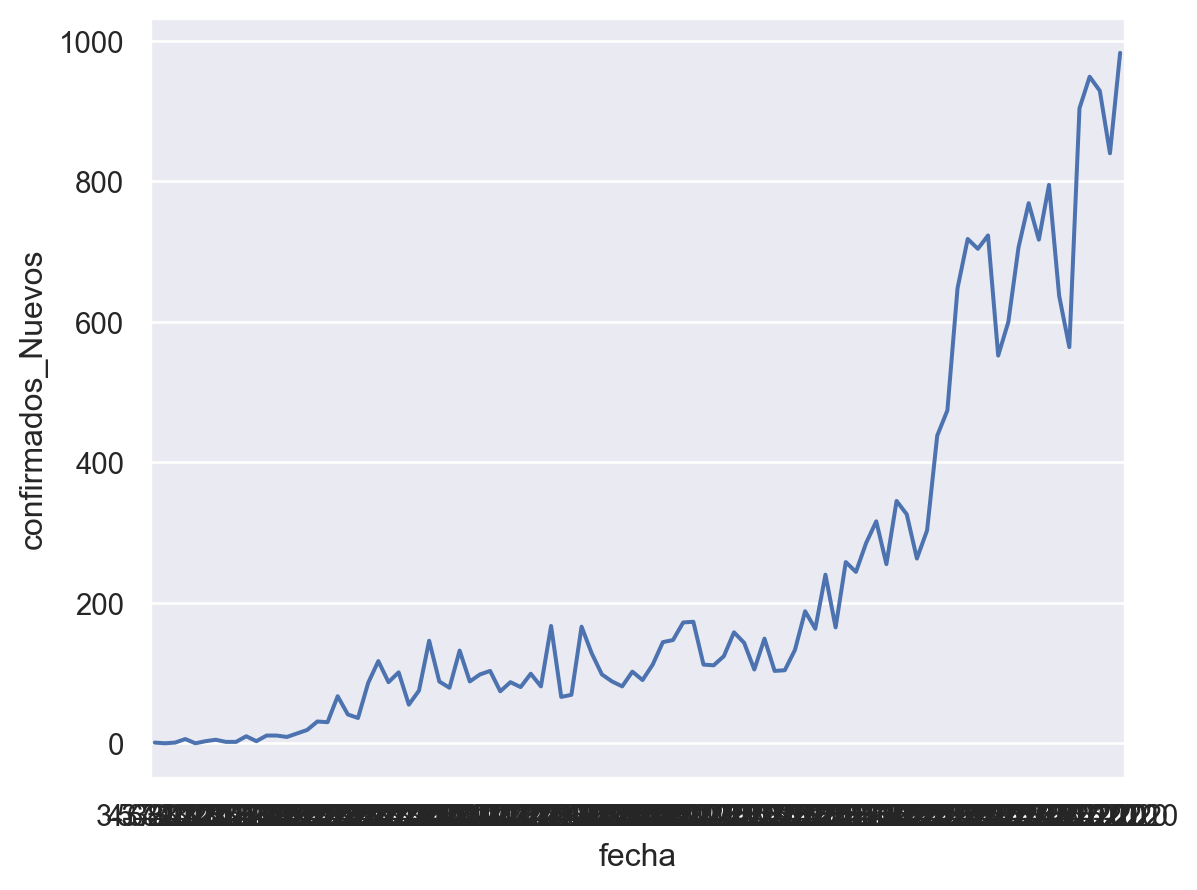

In [13]:
(
    so.Plot()
    .add(so.Line(), data = df, x = "fecha", y = "confirmados_Nuevos")
)

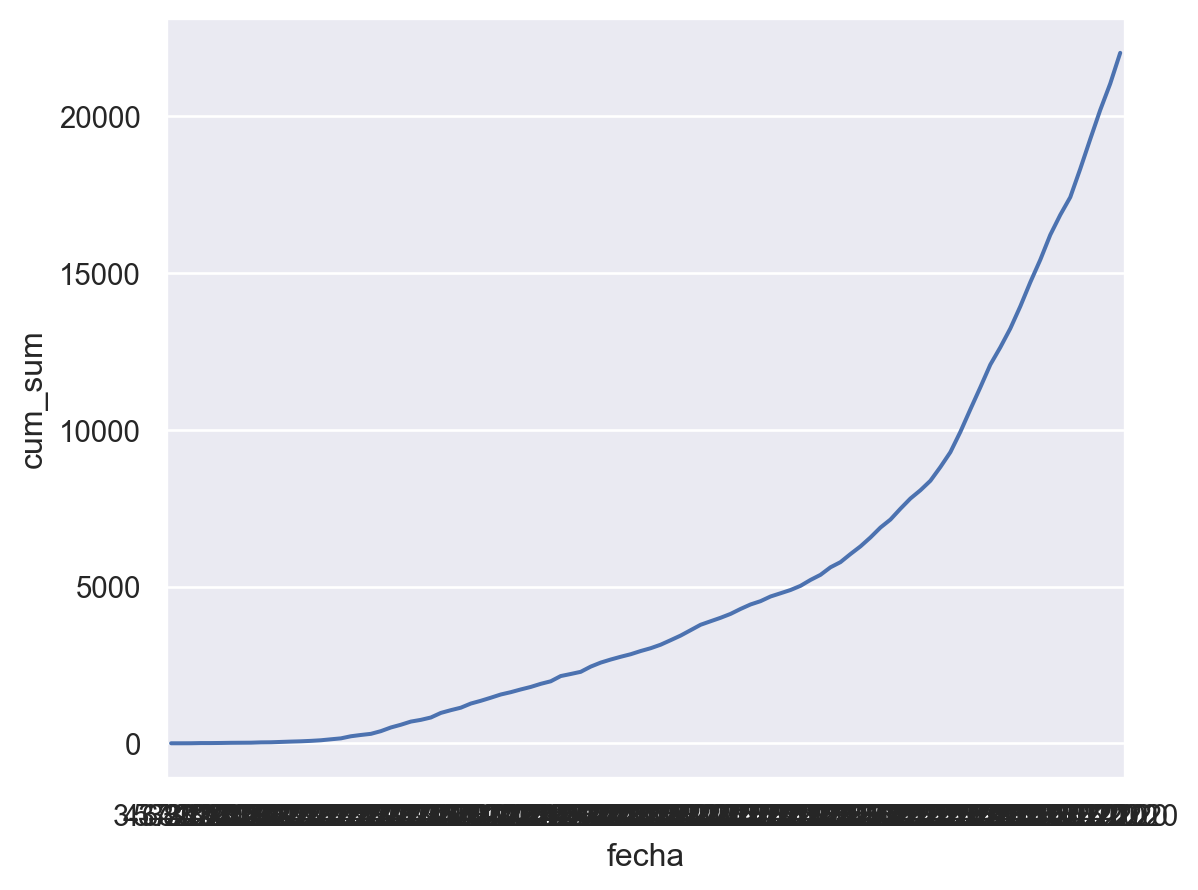

In [17]:
df["cum_sum"] = df["confirmados_Nuevos"].cumsum()
(
    so.Plot()
    .add(so.Line(), data = df, x = "fecha", y = "cum_sum")
)

In [19]:
log = np.log(df["cum_sum"])
log

0     0.000000
1     0.000000
2     0.693147
3     2.079442
4     2.079442
        ...   
91    9.815912
92    9.866409
93    9.913487
94    9.954228
95    9.999888
Name: cum_sum, Length: 96, dtype: float64

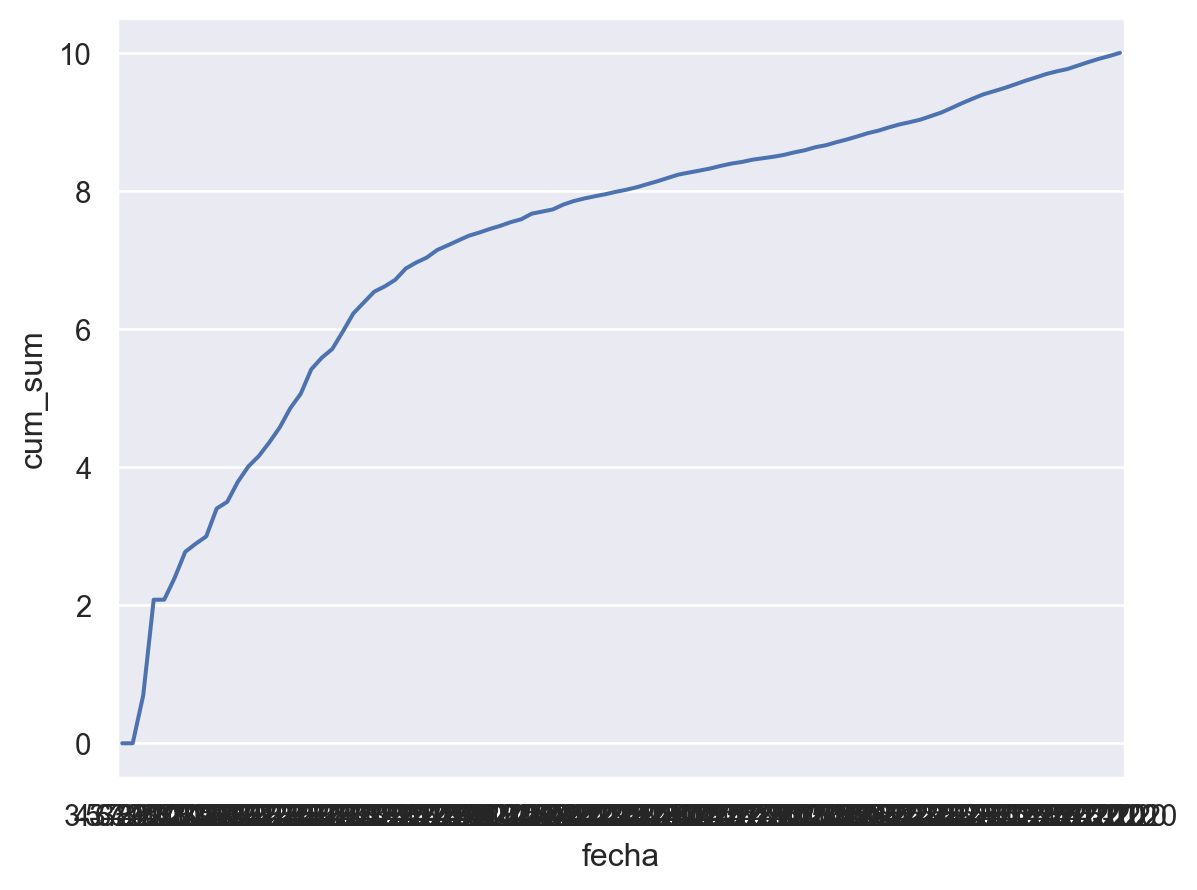

In [21]:
(
    so.Plot()
    .add(so.Line(), data = df, x = "fecha", y = log)
)

## Estadística descriptiva

# Variables categóricas: País, clase social, color.
# Variables numéricas: Edad, altura, notas.

In [24]:
from gapminder import gapminder
gapminder
# gdpPercap es una variable númerica, pues son números y es continua,  ya que toma valores intermedios, representa una medida.

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [25]:
# En el caso de tener una variable que describa ciertos rangos de gdpPercap en 0, 1 o 2 
# esta nueva variable es una variable númerica pero ahora es discreta, no toma valores intermadios.
# Si luego decidimos cambiar los números por palabaras a "bajo", "medio", o "alto" esta nueva variable sería categórica y ordinal, ya que exite un orden entre ellas.

In [41]:
gapminder2007 = gapminder[gapminder["year"] == 2007]
gapminder2007["gdpAlto"] =(gapminder2007["gdpPercap"] > 2000).astype(int)
display(gapminder2007)
gapminder2007.groupby("continent","gdpAlto")["gdpAlto"].sum()

C:\Users\santi\AppData\Local\Temp\ipykernel_2332\2871933502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder2007["gdpAlto"] =(gapminder2007["gdpPercap"] > 2000).astype(int)


,country,continent,year,lifeExp,pop,gdpPercap,gdpAlto
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,0
23,Albania,Europe,2007,76.423,3600523,5937.029526,1
35,Algeria,Africa,2007,72.301,33333216,6223.367465,1
47,Angola,Africa,2007,42.731,12420476,4797.231267,1
59,Argentina,Americas,2007,75.320,40301927,12779.379640,1
...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,1
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,1
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,1
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,0


ValueError: No axis named gdpAlto for object type DataFrame